# Why ANOVA


<ol style='font-family:verdana;color:brown;font-size:100%'>
    <li>ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)</li>
    <li>Groups mean differences inferred by analyzing variances</li>
<li>ANOVA uses variance-based F test to check the group mean equality. Sometimes, ANOVA F test is also called omnibus test as it tests non-specific null hypothesis i.e. all group means are equal</li>
    
<li>Main types: One-way (one factor - One Independent Variable) and two-way (two factors- two independent variable) ANOVA (<b>factor is an independent variable</b>)</li>
   
<li>It is also called univariate ANOVA as there is only one dependent variable in the model. MANOVA is used when there are multiple dependent variables in the dataset. If there is an additional continuous independent variable in the model, then ANCOVA is used.</li>
<li>If you have repeated measurements for treatments or time on same subjects, you should use Repeated Measure ANOVA</li>
</ol>

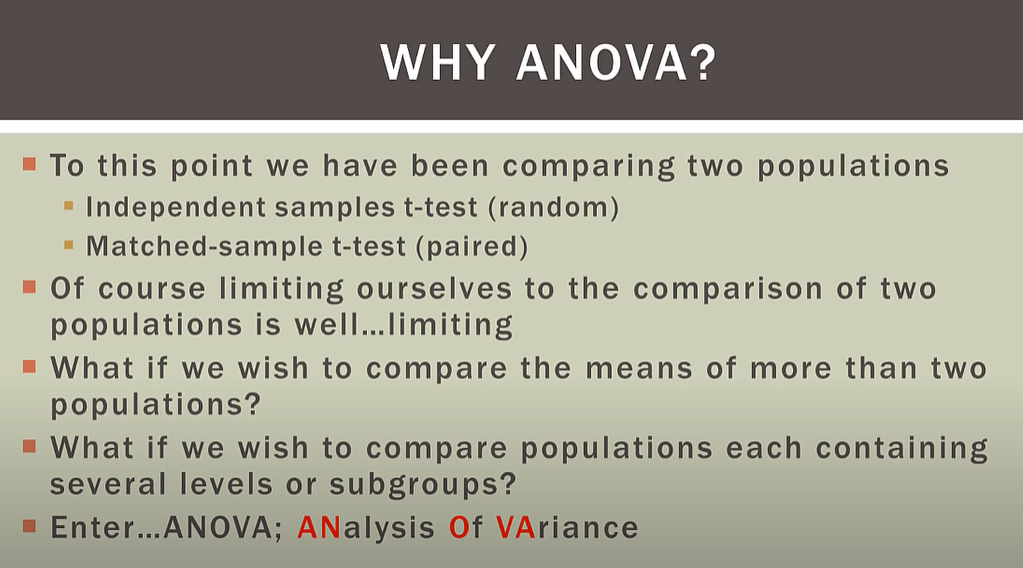

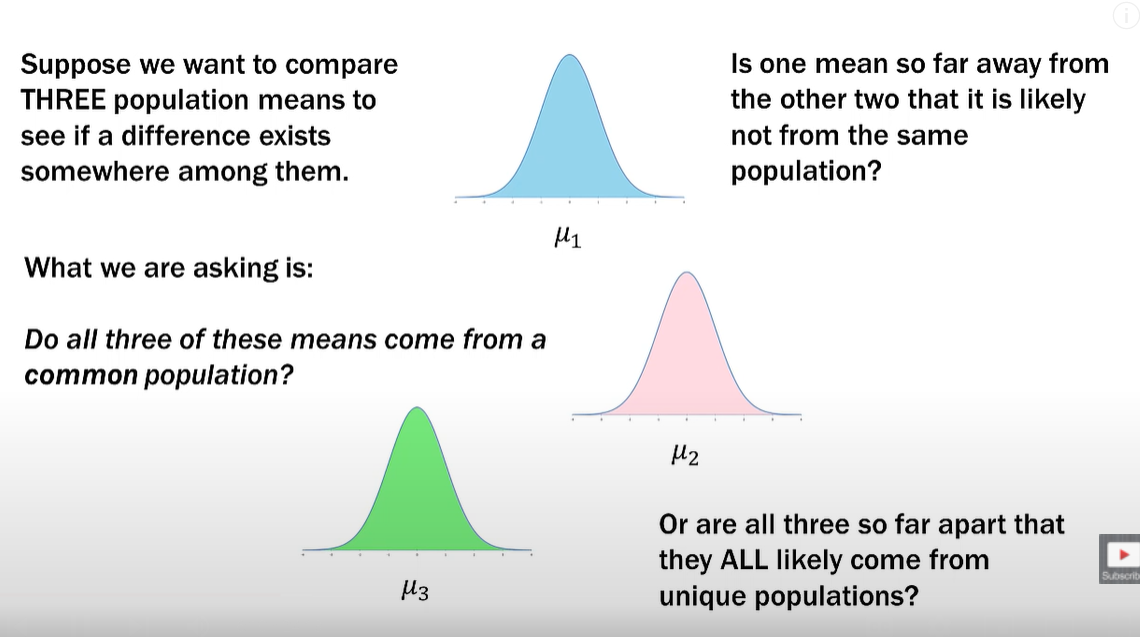

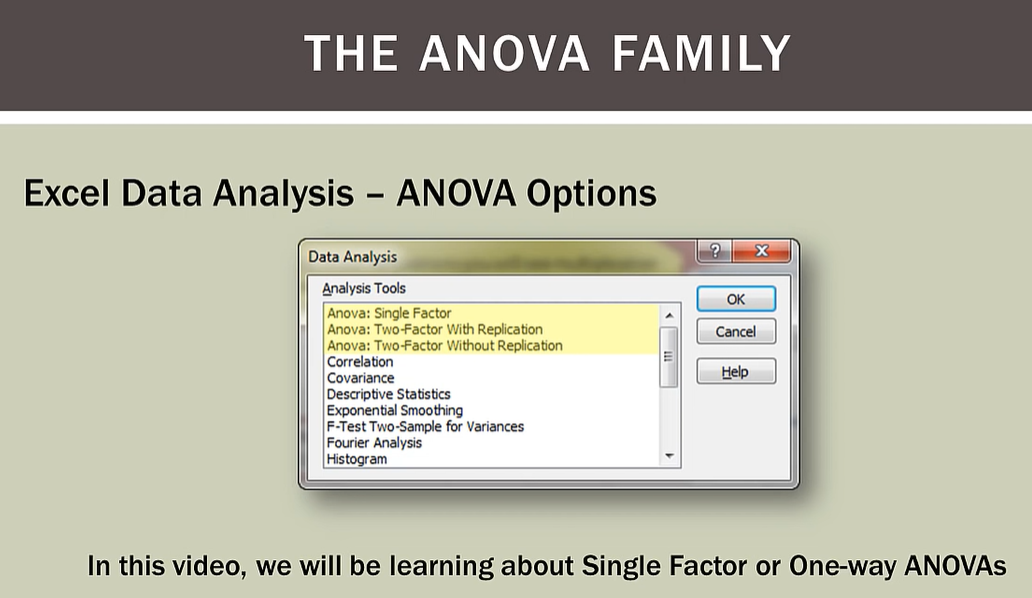

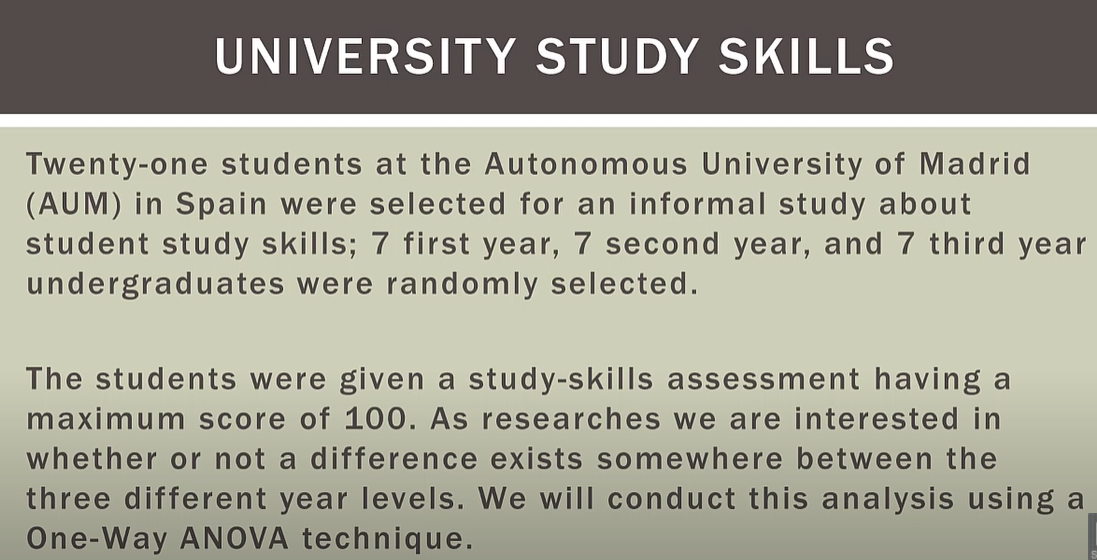

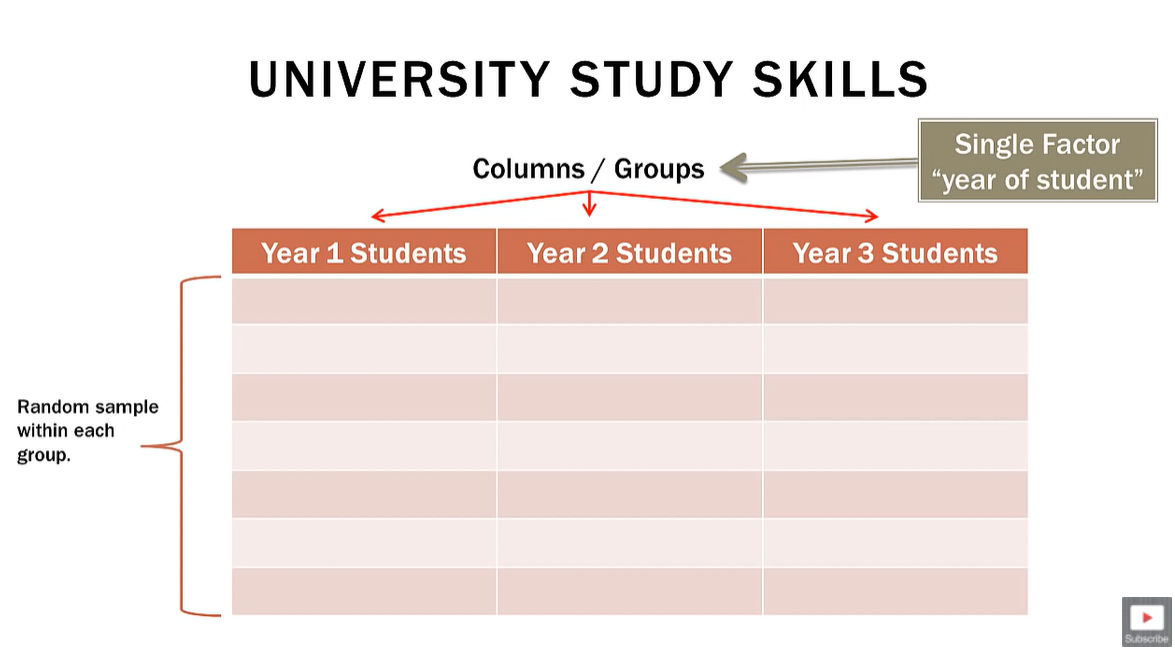

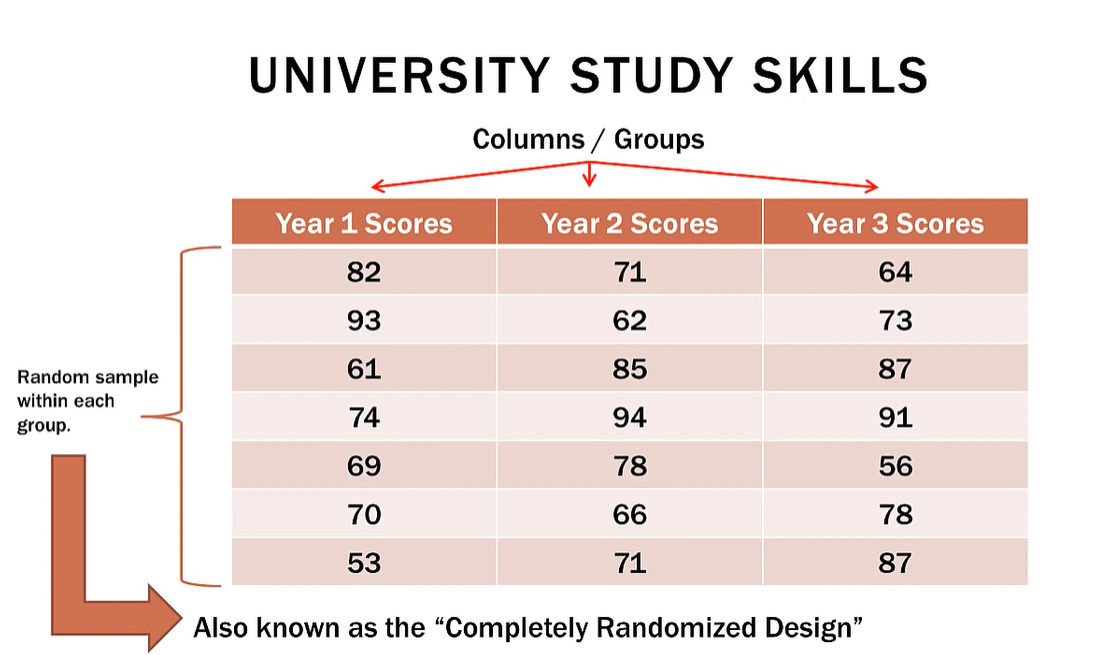

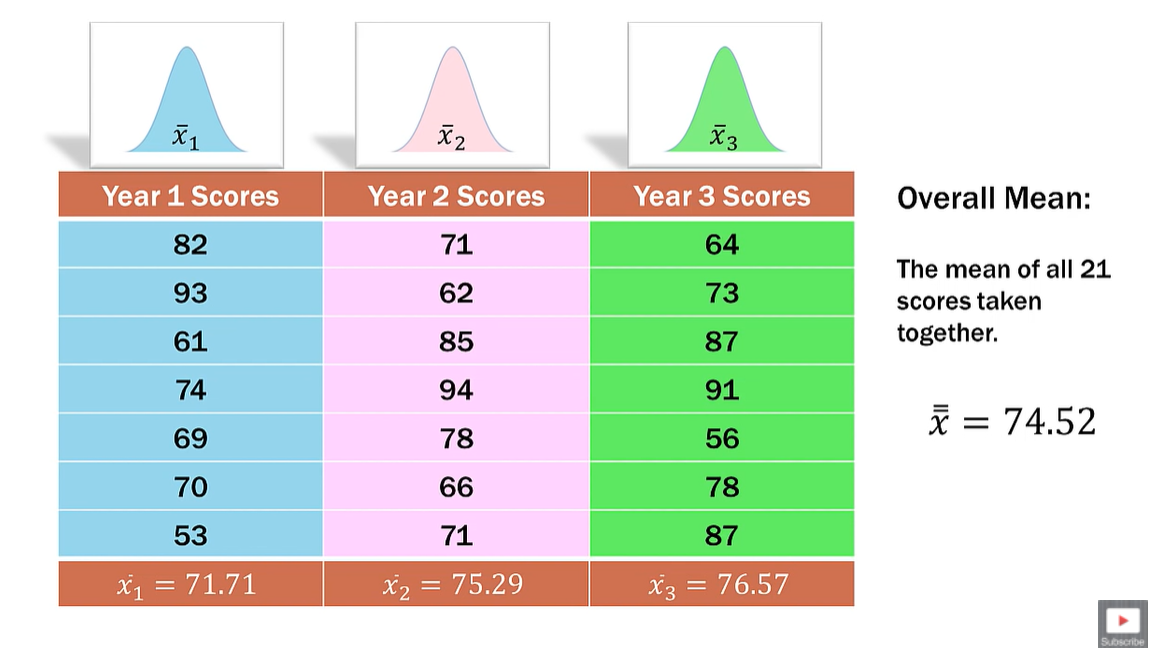

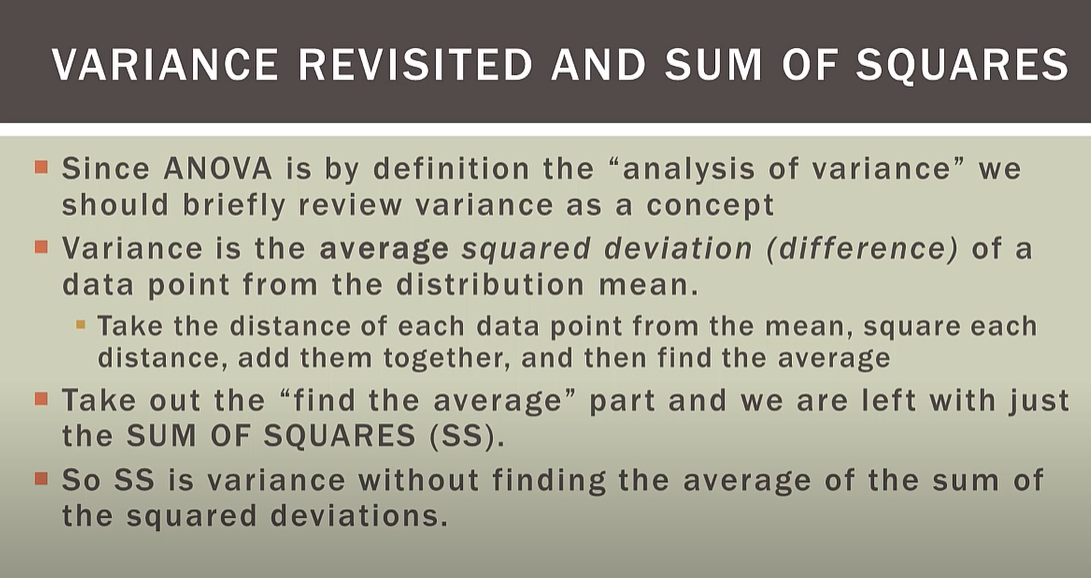

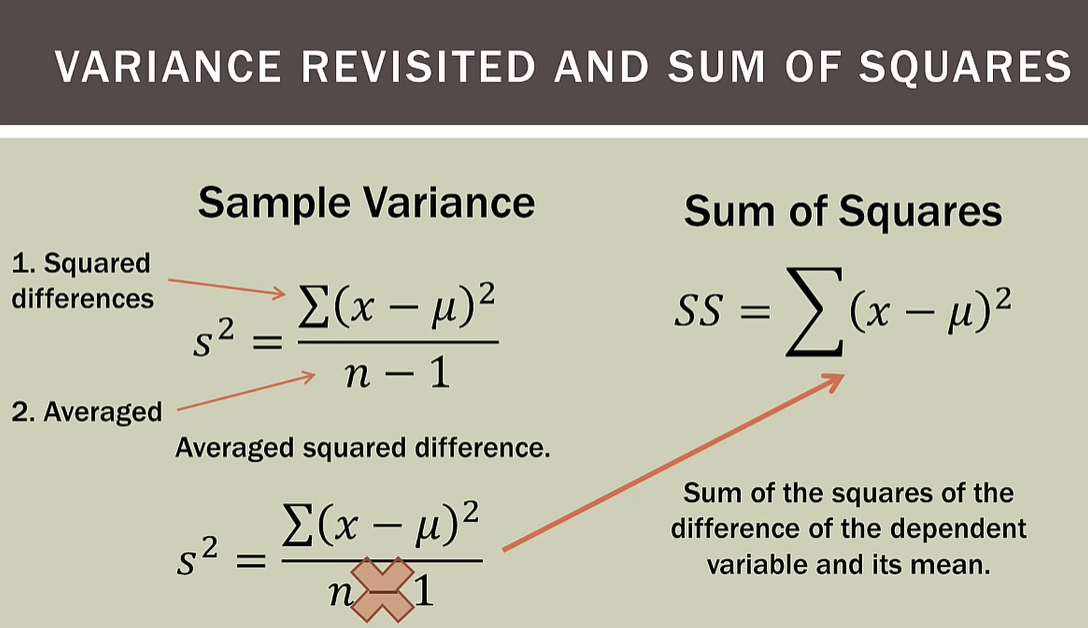

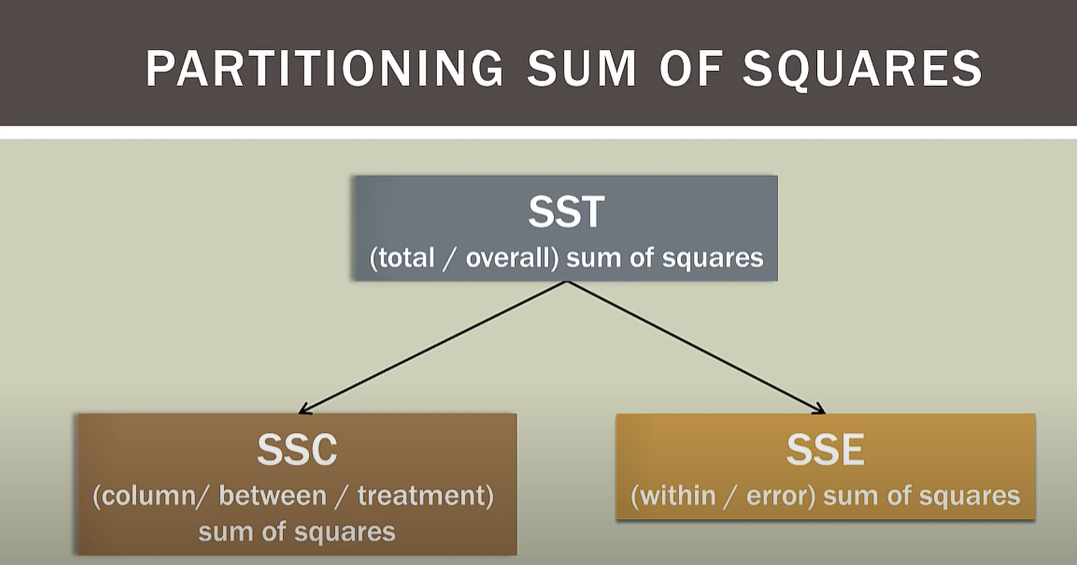

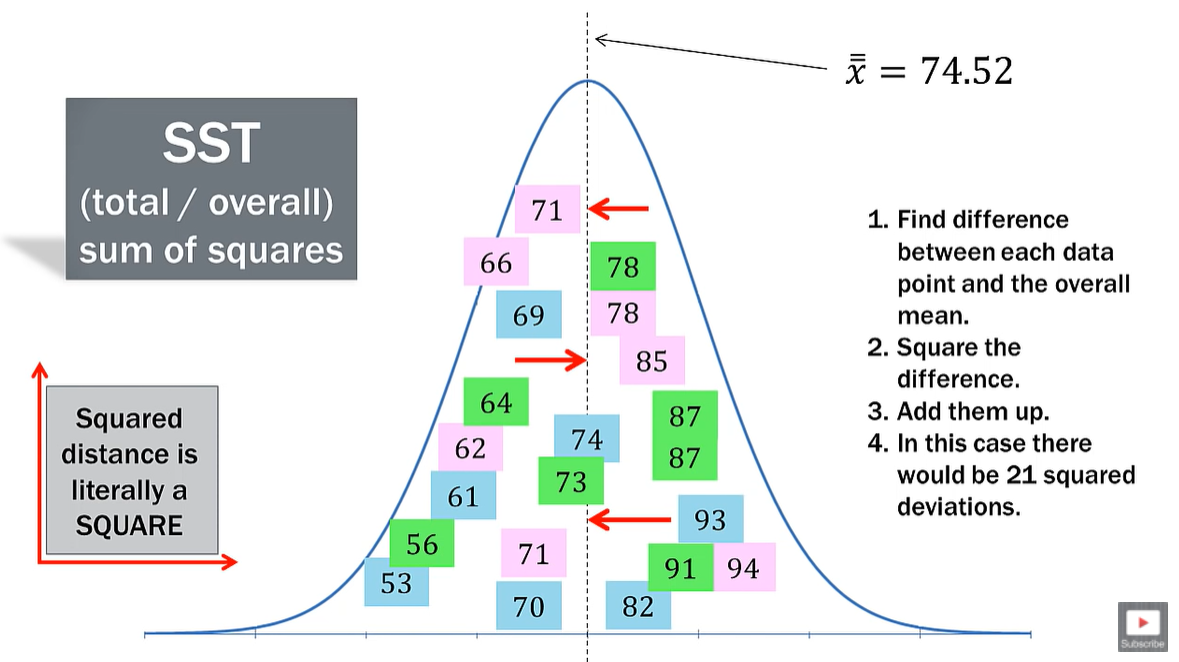

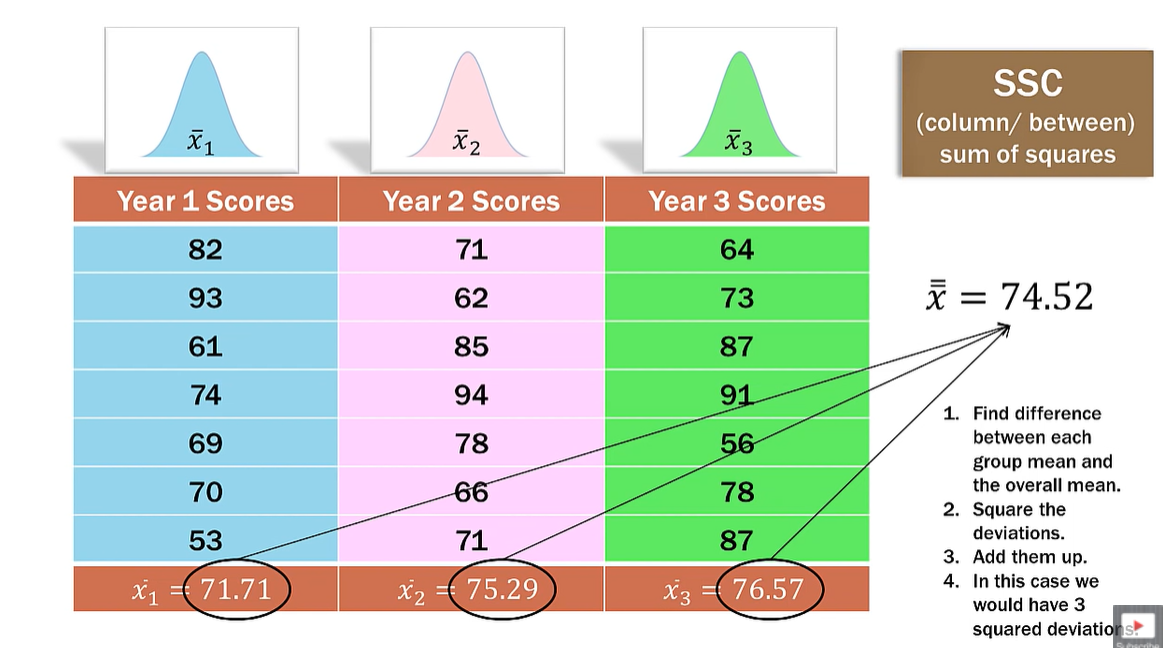

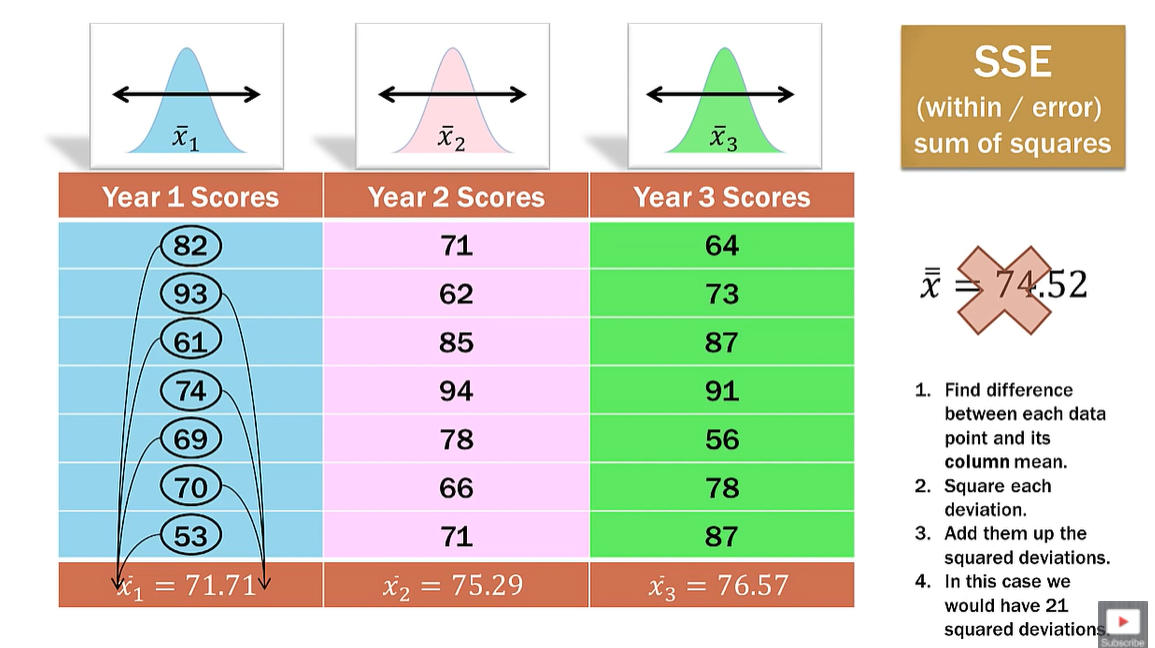

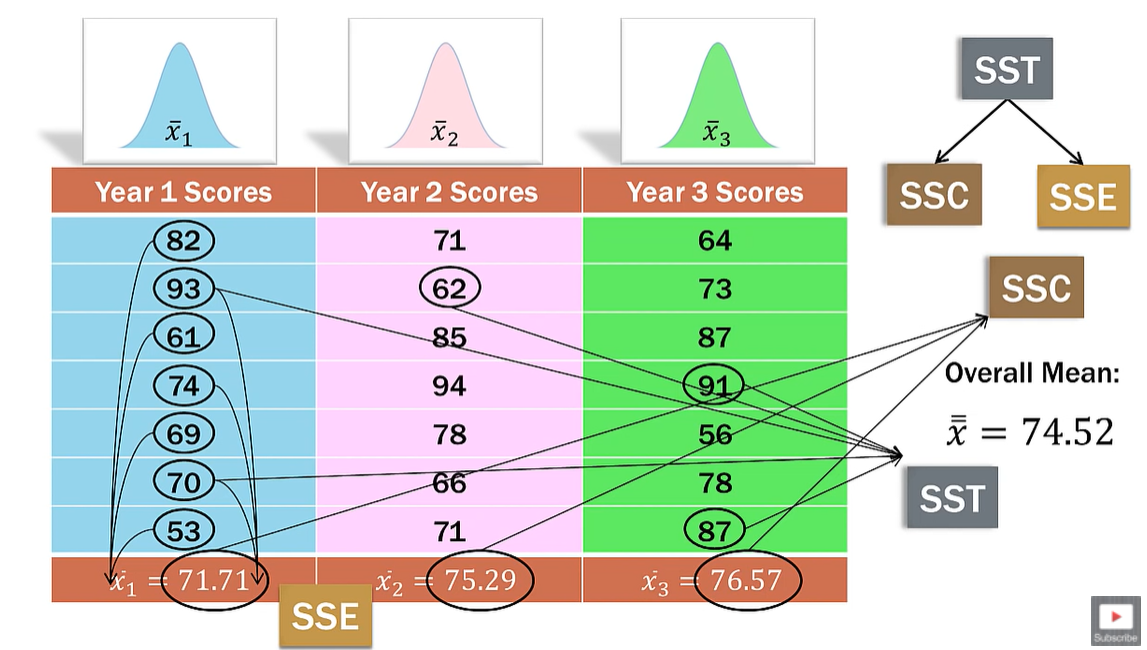

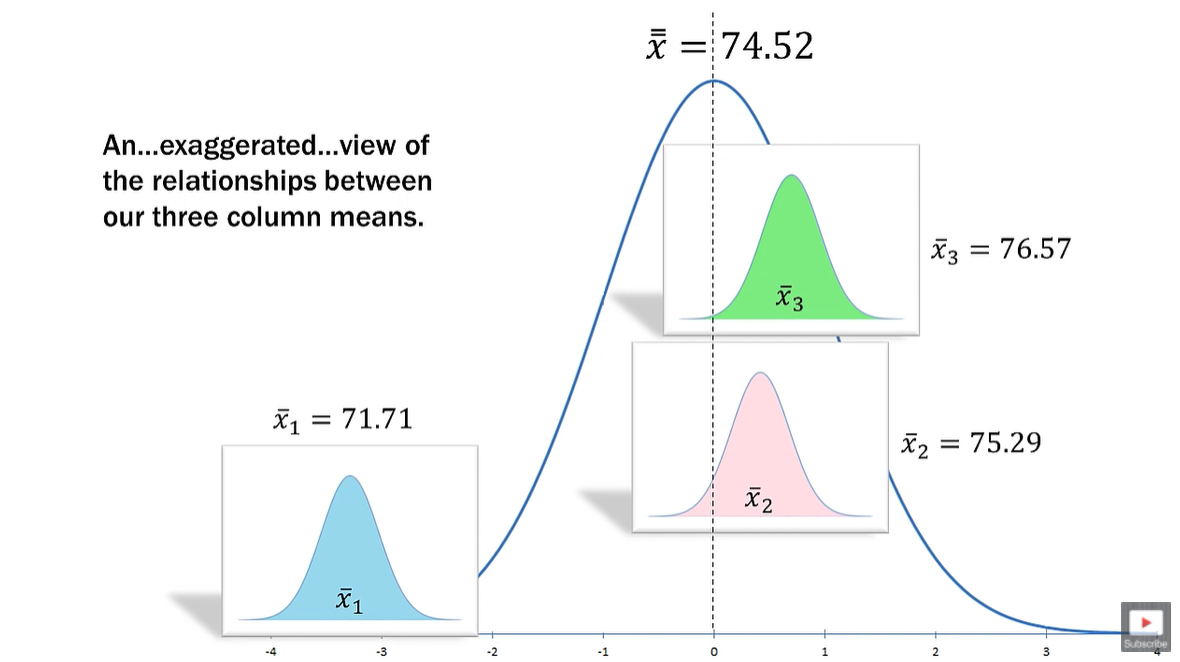

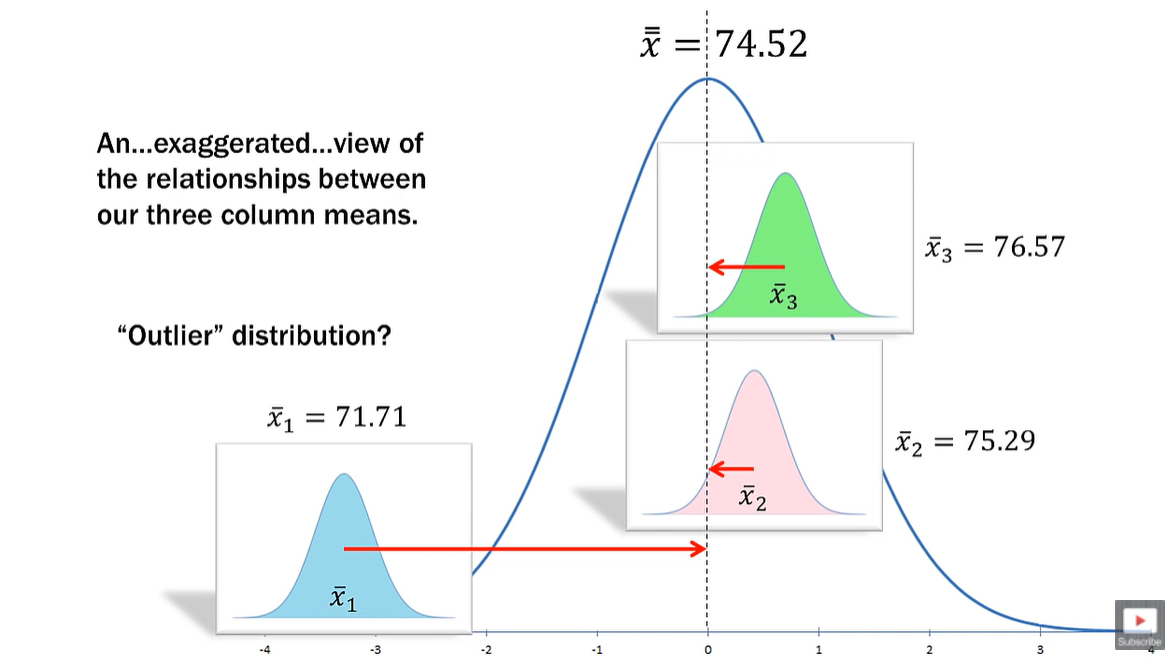

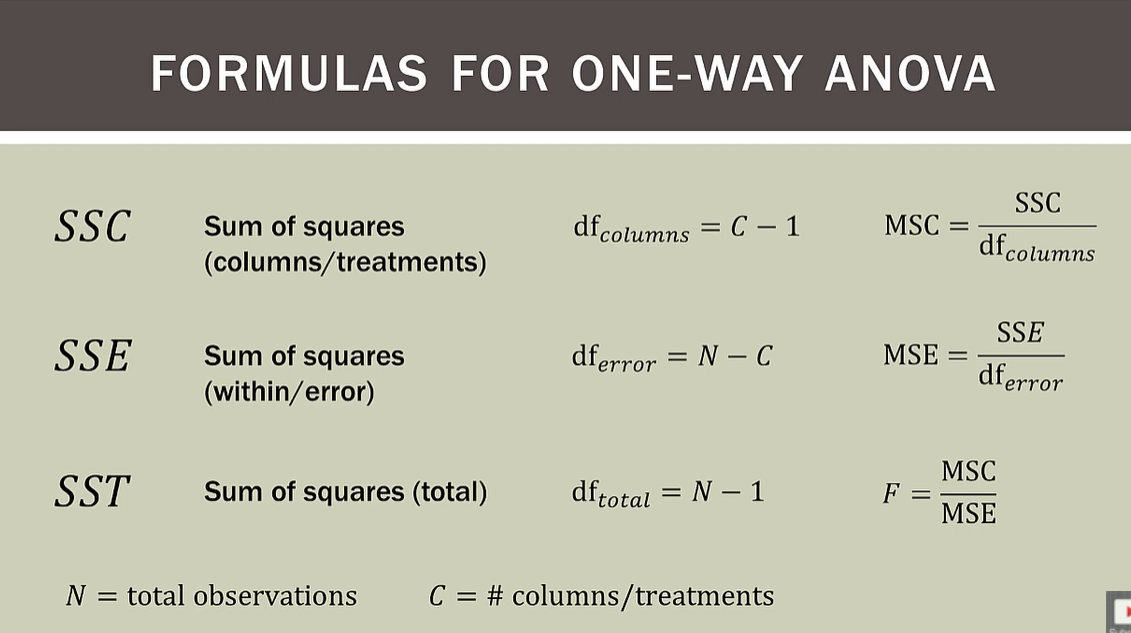

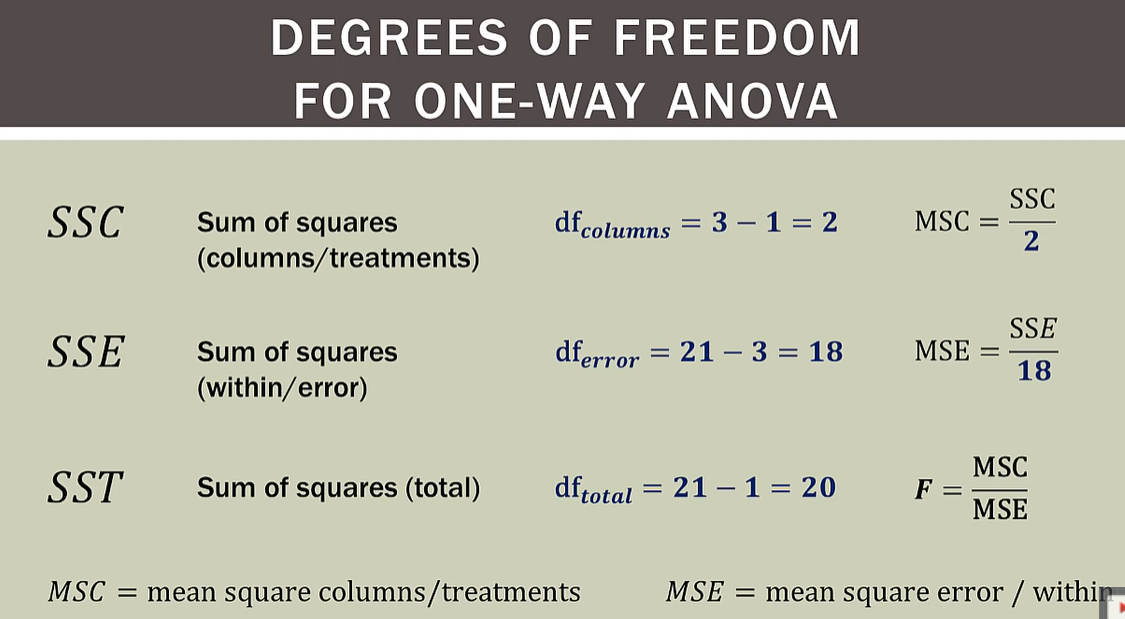

<h1> Refer Before Calcualtion : </h1>https://www.itl.nist.gov/div898/handbook/prc/section4/prc433.htm#Example

In [35]:
#Input 

# Expected :
# 1. Find whether there is any difference between mean of these three group of students


#Assumptions
#H0: mu_1=mu_2=mu_3
#Ha: mu_1!=mu_2!-mu_3

import pandas as pd

x_1=[82,93,61,74,69,70,53]
x_2=[71,62,85,94,78,66,71]
x_3=[64,73,87,91,56,78,87]


In [36]:
# Step 1 : Correction for the mean 
combined_samples = pd.Series(x_1+x_2+x_3)
# (Total of all observations)**2 / Total no of observation
total_of_all_observations = combined_samples.sum()
cm = total_of_all_observations**2 / len(combined_samples)
cm

116629.76190476191

In [37]:
#Step 2 : SS(Total) Total sum of Square 
# sum(Each_observation**2)-cm
each_obs_sq = [i**2 for i in combined_samples]
SST = sum(each_obs_sq)-cm
SST

2901.238095238092

In [38]:
#Step 3: Compute SSC (Sum of Squares Column) or Treatment sum of square (SSTr)
SSC = ((sum(x_1))**2/len(x_1))+((sum(x_2))**2/len(x_2))+((sum(x_3))**2/len(x_3))-cm

In [39]:
#Step 4 : Compute SSE 

# SST = SSC+SSE
SSE=SST-SSC
SSE

2812.5714285714203

In [40]:
# Step 5 Compute MST, MSE and the ratio F 

MSC = SSC/2
print('MSC :', MSC)
MSE= SSE/18
print('MSE', MSE)
F=MSC/MSE
print('F',F)


# Critical F value
from scipy.stats import f
# F Test curve starts from Right to left , 
# so if your alpha is 0.05 put it as 1-aplha in f.ppf(0.95,dof_nu,dof_den)
F_critical = f.ppf(0.95,2,18)   
print('F crit' , F_critical)

p = 1-f.cdf(F, 2, 18)
print('P value', p)

MSC : 44.33333333333576
MSE 156.2539682539678
F 0.28372612759042676
F crit 3.554557145661787
P value 0.7562784116739799


In [41]:
if F<F_critical:
    print('Fail to reject Null hyp')
else:
    print('Reject Null hyp')

Fail to reject Null hyp


# Another way to solve -1 - SCIPY Library

In [43]:
from scipy import stats 
f, p = stats.f_oneway(x_1,x_2,x_3)
print('F value {} ,  P Value {}'.format(f,p))


F value 0.2837261275904103 ,  P Value 0.7562784116739912


# IIT - Prof Ramesh - Suggestion 

<h2> MSC or MSTR </h2>

We have three group for the one independent variable (I year student, IInd year student , III rd year student)

Dependent variable : What they score in the exam out of 100  (Informal study was given to all of them)

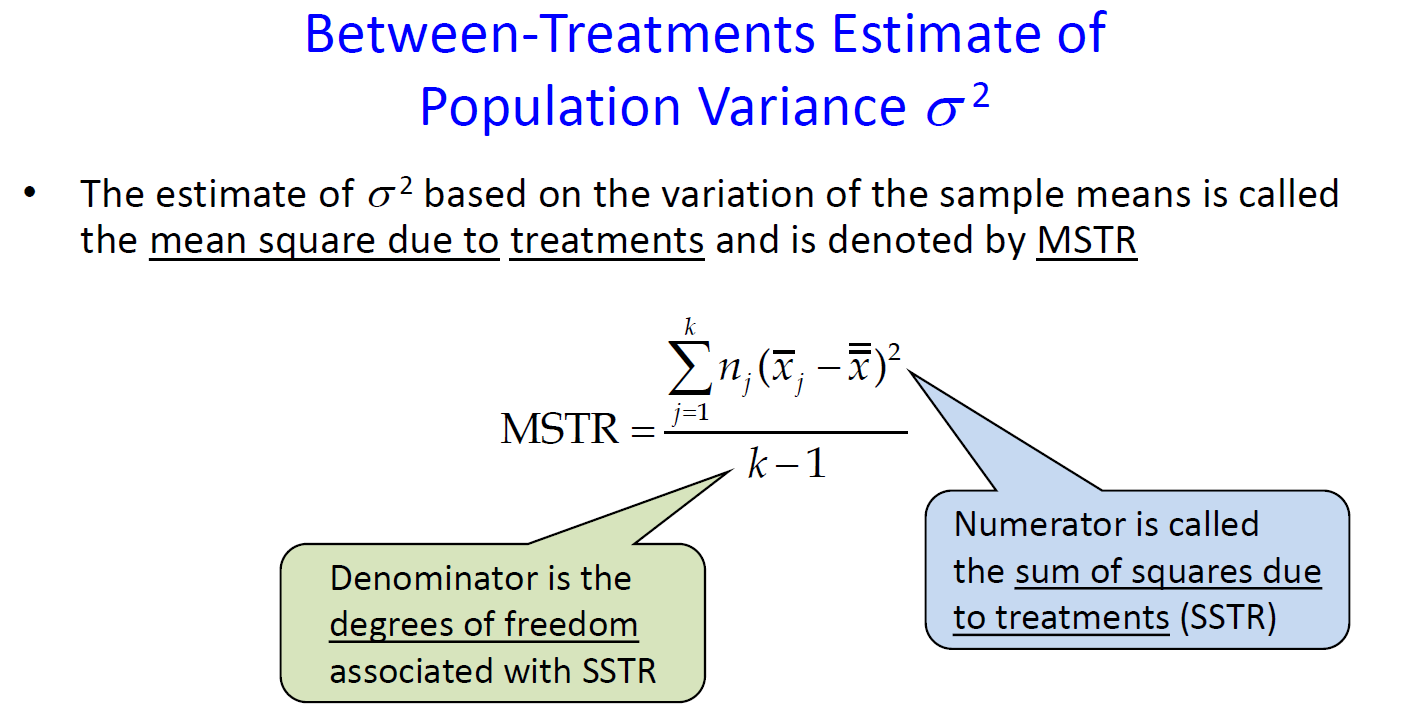

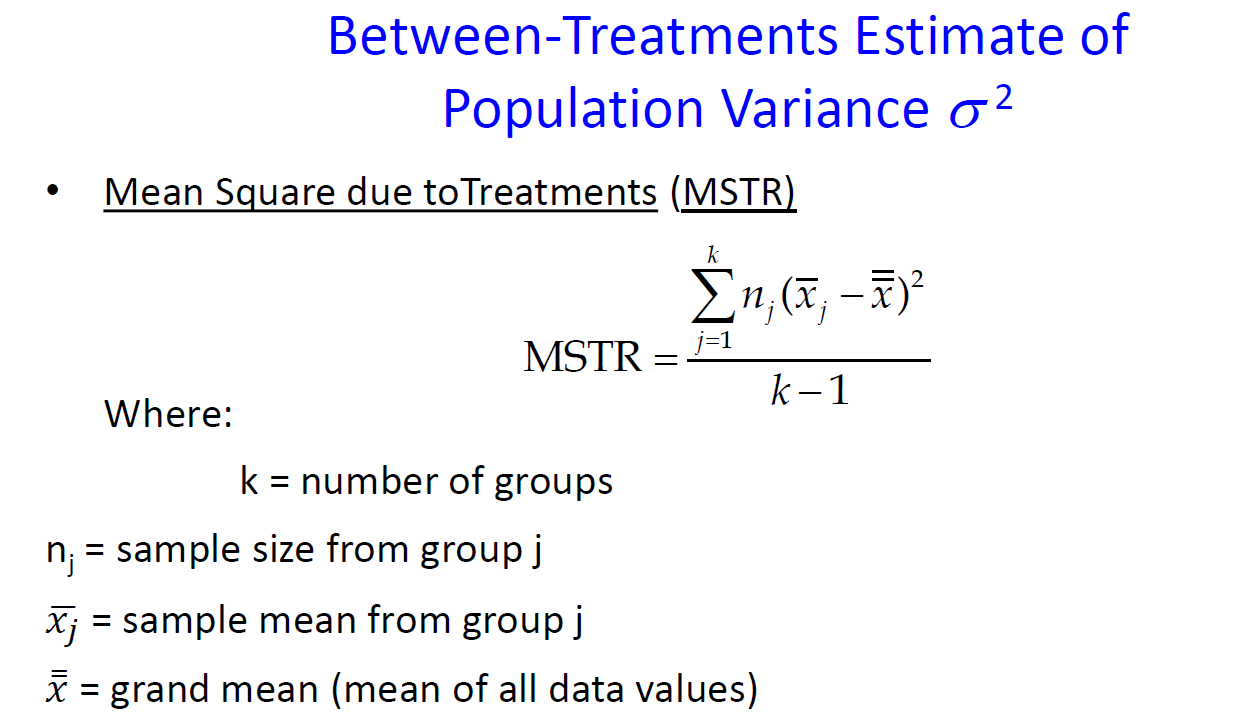

In [54]:
import pandas as pd
# We have three group for the one independent variable (I year student, IInd year student , III rd year student)
# Dependent variable : What they score in the exam out of 100  (Informal study was given to all of them)
# For each group we have 7 observations
# Total 21 observations
x_1_mean = pd.Series(x_1).mean()
x_2_mean = pd.Series(x_2).mean()
x_3_mean = pd.Series(x_3).mean()
overall_mean = pd.Series(x_1+x_2+x_3).mean()
print(x_1_mean,x_2_mean,x_3_mean,overall_mean)
SSC= (7*(x_1_mean-overall_mean)**2+7*(x_2_mean-overall_mean)**2+7*(x_3_mean-overall_mean)**2)
print('SSC', SSC)

MSC=SSC/2
print('MSC',MSC)

71.71428571428571 75.28571428571429 76.57142857142857 74.52380952380952
SSC 88.66666666666691
MSC 44.33333333333346


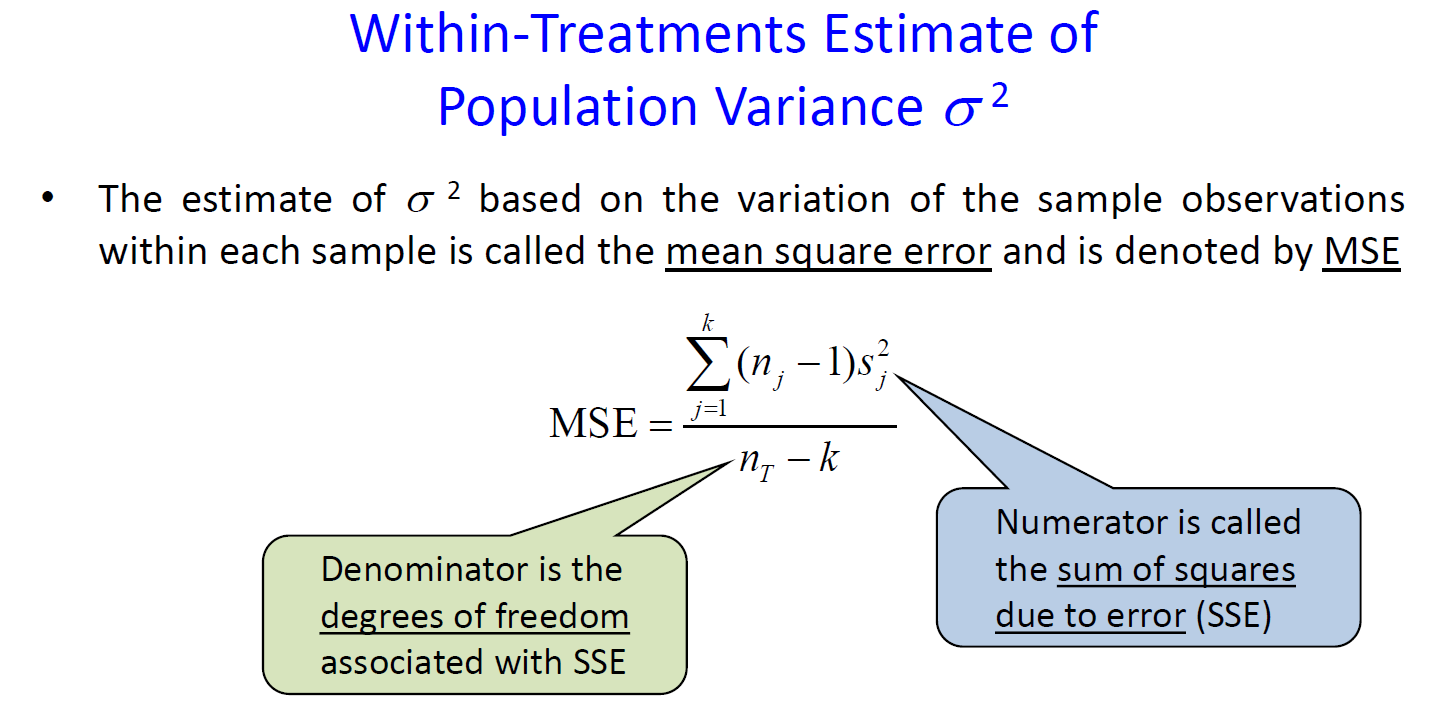

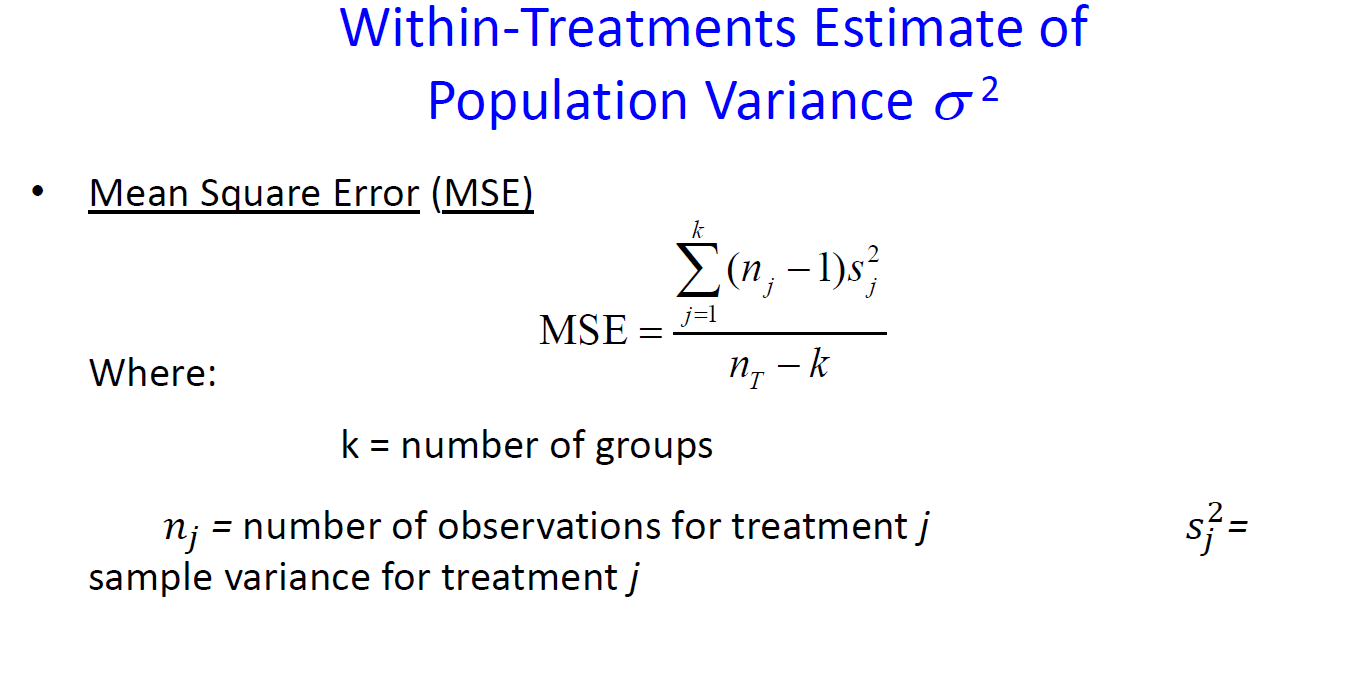



In [62]:
x_1_var = pd.Series(x_1).var()
x_2_var = pd.Series(x_2).var()
x_3_var = pd.Series(x_3).var()
SSE = (6*(x_1_var))+(6*x_2_var)+(6*x_3_var)  # Note in formula it Sj Square --> Because its variance 
print('SSE',SSE)

MSE = SSE/(21-3)
print('MSE', MSE)

SSE 2812.571428571429
MSE 156.25396825396828


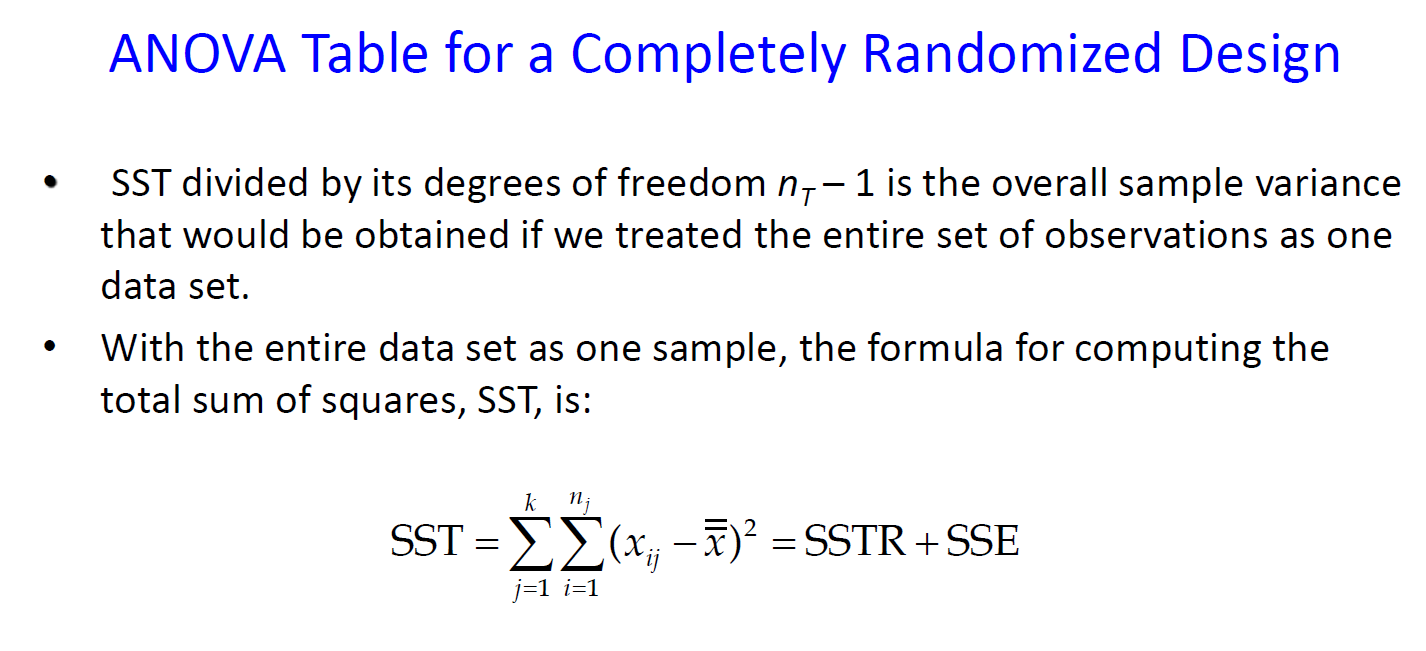

In [68]:
# Calculating SST , It is actaully not needed 
# SST = SSC+SSE
# However we will validate this

SST = sum([(i-overall_mean)**2 for i in x_1])+sum([(i-overall_mean)**2 for i in x_2])+sum([(i-overall_mean)**2 for i in x_3])
print('SST', SST)

#validating 
print('SSC + SSE =', SSC+SSE)

SST 2901.2380952380945
SSC + SSE = 2901.238095238096


In [69]:
F=MSC/MSE
F


0.28372612759041116